In [12]:
# libraries
import copy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import torch
import torch.nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
from tqdm import tqdm

matplotlib.rcParams['figure.figsize'] = [18, 12]
# code from this library - import the lines module
import loss_landscapes
import loss_landscapes.metrics

from essl.backbones import largerCNN_backbone
from essl.evaluate_downstream import finetune_model
from essl.datasets import Cifar10
import torch

# contour plot resolution
STEPS = 40

# backbone = largerCNN_backbone()
# model = finetune_model(backbone.backbone, backbone.in_features, 10)
# model_path = "/home/noah/ESSL/exps/Explainability/loss_landscape/exp1_0/worst/model.pt"
# model.load_state_dict(torch.load(model_path))
# model

# backbone = largerCNN_backbone()
# model_init = finetune_model(backbone.backbone, backbone.in_features, 10)
data = Cifar10()

trainloader = torch.utils.data.DataLoader(data.test_data,
                                                  batch_size=len(data.test_data), shuffle=False)
X, y = iter(trainloader).__next__()
X.shape
y.shape
# criterion = torch.nn.CrossEntropyLoss()
# metric = loss_landscapes.metrics.Loss(criterion, X, y)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


torch.Size([10000])

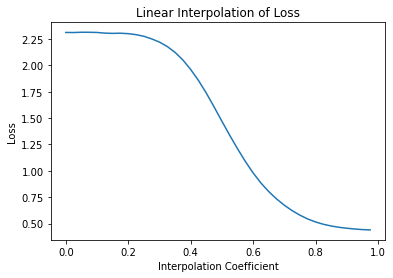

In [2]:
# compute loss data
loss_data = loss_landscapes.linear_interpolation(model_init, model, metric, STEPS, deepcopy_model=True)

plt.plot([1/STEPS * i for i in range(STEPS)], loss_data)
plt.title('Linear Interpolation of Loss')
plt.xlabel('Interpolation Coefficient')
plt.ylabel('Loss')
axes = plt.gca()
# axes.set_ylim([2.300,2.325])
plt.show()

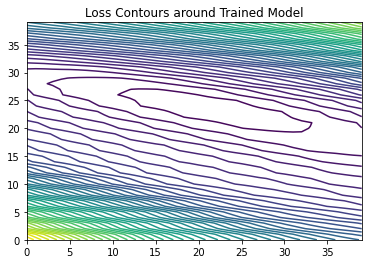

In [3]:
loss_data_fin = loss_landscapes.random_plane(model, metric, 10, STEPS, normalization='filter', deepcopy_model=True)
plt.contour(loss_data_fin, levels=50)
plt.title('Loss Contours around Trained Model')
plt.show()

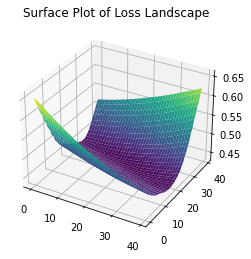

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.array([[j for j in range(STEPS)] for i in range(STEPS)])
Y = np.array([[i for _ in range(STEPS)] for i in range(STEPS)])
ax.plot_surface(X, Y, loss_data_fin, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Surface Plot of Loss Landscape')
fig.show()